# 43A-modeling-ARIMA-Aggregate

> Determining iPhone 14 claims through aggregate claims method to predict and subtract out the prediction values of each of the iPhone models until we're left with iPhone 14 predictions. As discussed with professor, this is a potential idea to try out.

The result from this notebook is that it's not a viable method as the iPhone 14 prediction values calculated through this approach came out negative.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pmdarima as pm

import os

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from pmdarima.arima import ADFTest

from sklearn.metrics import r2_score

# Load the data

In [9]:
#Constants/globals
os.chdir('/data/p_dsi/teams2023/team9/')
os.getcwd()

'/gpfs52/data/p_dsi/teams2023/team9'

In [10]:
#load the data
data = pd.read_csv("Asurion_clean_data_feature_set.csv")
display(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11684 entries, 0 to 11683
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   phone model       11684 non-null  object
 1   phone size        11684 non-null  object
 2   phone color       11684 non-null  object
 3   claim             11684 non-null  int64 
 4   weeks_monday      11684 non-null  object
 5   month             11684 non-null  object
 6   year              11684 non-null  int64 
 7   season            11684 non-null  object
 8   quarter           11684 non-null  object
 9   Holidays_Boolean  11684 non-null  bool  
 10  company           11684 non-null  object
 11  model_group       11684 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 1015.6+ KB


None

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
0,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
1,apple iphone 11,128gb,green,45,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
2,apple iphone 11,128gb,purple,92,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
3,apple iphone 11,128gb,red,69,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
4,apple iphone 11,128gb,white,91,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
5,apple iphone 11,128gb,yellow,5,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
6,apple iphone 11,256gb,black,24,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
7,apple iphone 11,256gb,green,3,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
8,apple iphone 11,256gb,purple,7,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
9,apple iphone 11,256gb,red,9,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11


In [11]:
group_model = data.groupby('model_group')
group_model.first()

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company
model_group,,,,,,,,,,,
iphone 11,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple
iphone 12,apple iphone 12,128gb,black,68,2022-01-24,January,2022,winter,Q1,False,apple
iphone 13,apple iphone 13,128gb,midnight,11,2022-01-24,January,2022,winter,Q1,False,apple
iphone 14,apple iphone 14,128gb,black,7,2022-11-14,November,2022,autumn,Q4,False,apple
iphone se,apple iphone se,128gb,gray,1,2022-01-24,January,2022,winter,Q1,False,apple
iphone x,apple iphone x,256gb,gray,62,2022-01-24,January,2022,winter,Q1,False,apple


   weeks_monday  claim
0    2021-06-28   3273
1    2021-07-05   8536
2    2021-07-12   7942
3    2021-07-19   7873
4    2021-07-26   7762
..          ...    ...
81   2023-01-16  11189
82   2023-01-23  11131
83   2023-01-30   9981
84   2023-02-06  12280
85   2023-02-13   2283

[86 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weeks_monday  86 non-null     object
 1   claim         86 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


None

Text(0.5, 1.0, 'Sum of All iPhone Claims')

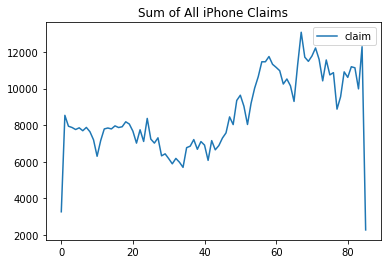

In [12]:
result_iphone_all = data.groupby(['weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_all)
display(result_iphone_all.info())
result_iphone_all.plot()
plt.title("Sum of All iPhone Claims")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weeks_monday  85 non-null     object
 1   claim         85 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


None

Text(0.5, 1.0, 'Sum of All iPhone Claims')

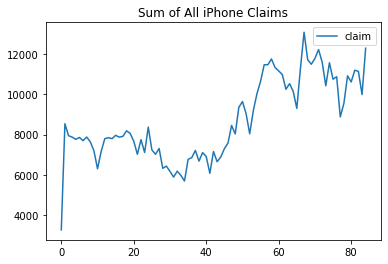

In [13]:
# Removing last data point as recommended by professor, we have reason to think that the data is an outlier due to
# the data being incomplete

result_iphone_all = result_iphone_all[:85]

display(result_iphone_all.info())
result_iphone_all.plot()
plt.title("Sum of All iPhone Claims")

Text(0.5, 1.0, 'iPhone 14')

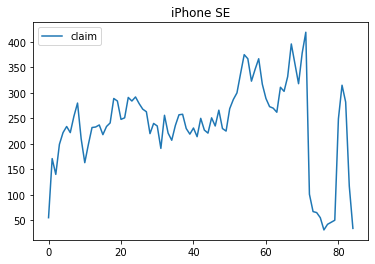

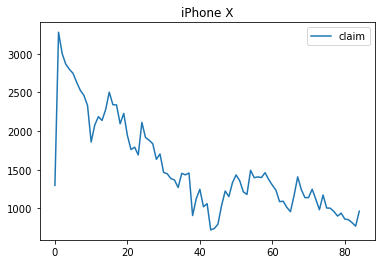

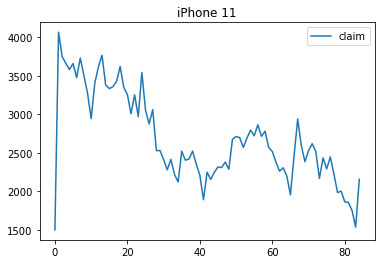

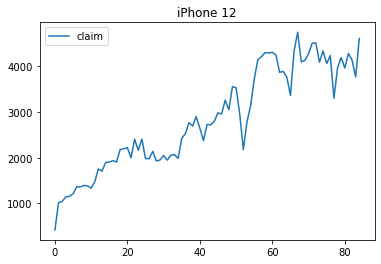

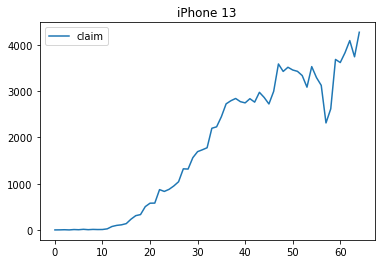

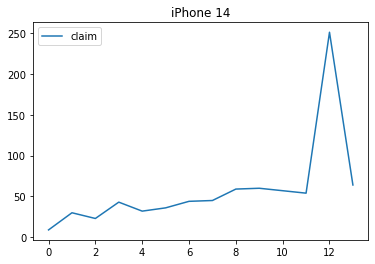

In [14]:
# As discussed with professor, removing the last row of aggregate data since it looks like their incomplete data, this is
# applied to all models except currently to iPhone 14 due to data scarcity
iphonese = data[data["model_group"] == "iphone se"]
result_iphone_se = iphonese.groupby(['weeks_monday'], as_index = False).agg({'claim': np.sum})
result_iphone_se = result_iphone_se[:-1]


iphonex = data[data["model_group"] == "iphone x"]
result_iphone_x = iphonex.groupby(['weeks_monday'], as_index = False).agg({'claim': np.sum})
result_iphone_x = result_iphone_x[:-1]

iphone11 = data[data["model_group"] == "iphone 11"]
result_iphone_11 = iphone11.groupby(['weeks_monday'], as_index = False).agg({'claim': np.sum})
result_iphone_11 = result_iphone_11[:-1]

iphone12 = data[data["model_group"] == "iphone 12"]
result_iphone_12 = iphone12.groupby(['weeks_monday'], as_index = False).agg({'claim': np.sum})
result_iphone_12 = result_iphone_12[:-1]

iphone13 = data[data["model_group"] == "iphone 13"]
result_iphone_13 = iphone13.groupby(['weeks_monday'], as_index = False).agg({'claim': np.sum})
result_iphone_13 = result_iphone_13[:65]

# I have decided to not reduce the value for iPhone 14 data to leave it intact due to the scarcity in the total data
iphone14 = data[data["model_group"] == "iphone 14"]
result_iphone_14 = iphone14.groupby(['weeks_monday'], as_index = False).agg({'claim': np.sum})


result_iphone_se.plot()
plt.title("iPhone SE")
result_iphone_x.plot()
plt.title("iPhone X")
result_iphone_11.plot()
plt.title("iPhone 11")
result_iphone_12.plot()
plt.title("iPhone 12")
result_iphone_13.plot()
plt.title("iPhone 13")
result_iphone_14.plot()
plt.title("iPhone 14")

In [15]:
result_iphone_se['weeks_monday'] = pd.to_datetime(result_iphone_se['weeks_monday'])
result_iphone_se.set_index('weeks_monday', inplace = True)
# Changed up result_iphone_se so it can use the weeks_monday

result_iphone_x['weeks_monday'] = pd.to_datetime(result_iphone_x['weeks_monday'])
result_iphone_x.set_index('weeks_monday', inplace = True)
# Changed up result_iphone_x so it can use the weeks_monday

result_iphone_11['weeks_monday'] = pd.to_datetime(result_iphone_11['weeks_monday'])
result_iphone_11.set_index('weeks_monday', inplace = True)
# Changed up result_iphone_11 so it can use the weeks_monday

result_iphone_12['weeks_monday'] = pd.to_datetime(result_iphone_12['weeks_monday'])
result_iphone_12.set_index('weeks_monday', inplace = True)
# Changed up result_iphone_12 so it can use the weeks_monday

result_iphone_13['weeks_monday'] = pd.to_datetime(result_iphone_13['weeks_monday'])
result_iphone_13.set_index('weeks_monday', inplace = True)
# Changed up result_iphone_13 so it can use the weeks_monday

result_iphone_14['weeks_monday'] = pd.to_datetime(result_iphone_14['weeks_monday'])
result_iphone_14.set_index('weeks_monday', inplace = True)
# Changed up result_iphone_14 so it can use the weeks_monday

result_iphone_all['weeks_monday'] = pd.to_datetime(result_iphone_all['weeks_monday'])
result_iphone_all.set_index('weeks_monday', inplace = True)
# Changed up result_iphone_14 so it can use the weeks_monday

In [16]:
# Making a copy just in case

result_iphone_se_v2 = result_iphone_se.copy()
result_iphone_x_v2 = result_iphone_x.copy()
result_iphone_11_v2 = result_iphone_11.copy()
result_iphone_12_v2 = result_iphone_12.copy()
result_iphone_13_v2 = result_iphone_13.copy()
result_iphone_14_v2 = result_iphone_14.copy()
result_iphone_all_v2 = result_iphone_all.copy()

,claim
weeks_monday,
2021-06-28,3273
2021-07-05,8536
2021-07-12,7942
2021-07-19,7873
2021-07-26,7762
...,...
2023-01-09,10608
2023-01-16,11189
2023-01-23,11131


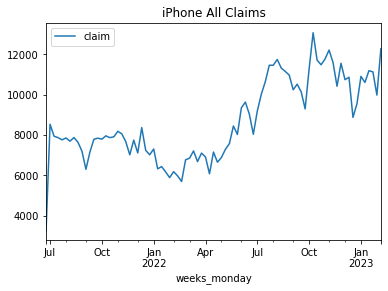

In [17]:
result_iphone_all.plot()
plt.title("iPhone All Claims")
# Plot has x-axis as weeks_monday

display(result_iphone_all)

In [18]:
train_all = result_iphone_all[:68]
test_all = result_iphone_all[-17:]

display(train_all)
display(test_all)

,claim
weeks_monday,
2021-06-28,3273
2021-07-05,8536
2021-07-12,7942
2021-07-19,7873
2021-07-26,7762
...,...
2022-09-12,10520
2022-09-19,10145
2022-09-26,9296


,claim
weeks_monday,
2022-10-17,11711
2022-10-24,11483
2022-10-31,11774
2022-11-07,12213
2022-11-14,11590
2022-11-21,10418
2022-11-28,11558
2022-12-05,10744
2022-12-12,10866


In [19]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(result_iphone_all)

# We still expect to d = 1

(0.561330143349898, True)

Text(0.5, 1.0, 'All iPhone Claims as Train and Test Data')

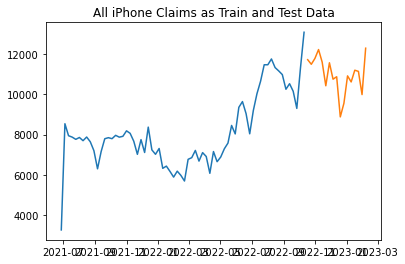

In [20]:
plt.plot(train_all)
plt.plot(test_all)
plt.title("All iPhone Claims as Train and Test Data")

In [21]:
arima_model = pm.auto_arima(train_all,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5, max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5, max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True, stepwise=True,
          random_state=20, n_fits=50)

# This came back with actually a SARIMA model with (p, d, q,) (P, D, Q)S
# Returned back as (0,1,0)(3,1,0)[12]

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=931.432, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=923.316, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=930.894, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=920.929, Time=0.52 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=920.349, Time=1.06 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=922.141, Time=2.18 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=922.315, Time=2.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=3.79 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=918.465, Time=0.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=919.074, Time=0.40 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=920.347, Time=1.50 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, T

In [22]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   68
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 12)   Log Likelihood                -455.232
Date:                            Wed, 29 Mar 2023   AIC                            918.465
Time:                                    01:24:31   BIC                            926.494
Sample:                                06-28-2021   HQIC                           921.570
                                     - 10-10-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6867      0.164     -4.190      0.000      -1.008      -0.366
ar.S.L24      -0.5299      0.244     -2.169      0.030      -1.009      -0.051
ar.S.L36      -0.2854      0.343     -0.831      0.406      -0.959       0.388
sigma2      8.892e+05   2.27e+05      3.917      0.000    4.44e+05    1.33e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                23.83
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.99
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 24))
prediction.columns = ['predicted_values']
prediction

# Predicting the next 24 values, which includes test data periods and the additional future prediction values

,predicted_values
2022-10-17,13323.280634
2022-10-24,13151.040128
2022-10-31,13424.641776
2022-11-07,13509.424887
2022-11-14,13770.369722
2022-11-21,13685.541818
2022-11-28,13310.624203
2022-12-05,13487.586862
2022-12-12,12886.273650
2022-12-19,12628.992725


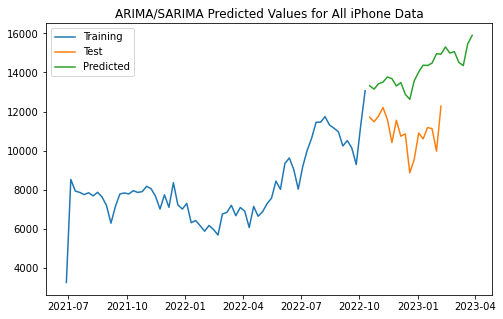

,claim
weeks_monday,
2022-10-17,11711
2022-10-24,11483
2022-10-31,11774
2022-11-07,12213
2022-11-14,11590
2022-11-21,10418
2022-11-28,11558
2022-12-05,10744
2022-12-12,10866


,predicted_values
2022-10-17,13323.280634
2022-10-24,13151.040128
2022-10-31,13424.641776
2022-11-07,13509.424887
2022-11-14,13770.369722
2022-11-21,13685.541818
2022-11-28,13310.624203
2022-12-05,13487.586862
2022-12-12,12886.273650
2022-12-19,12628.992725


In [24]:
plt.figure(figsize=(8,5))
plt.plot(train_all,label="Training")
plt.plot(test_all,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.title("ARIMA/SARIMA Predicted Values for All iPhone Data")
plt.show()

# Displaying our original test data set
display(test_all)

display(prediction)

In [25]:
test_all['predicted_values'] = prediction
r2_score(test_all['claim'], test_all['predicted_values'])

# Negative r2_score, so the model is not good

/tmp/ipykernel_2032/451446493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_all['predicted_values'] = prediction


-9.978535326019417

In [26]:
score = np.sqrt(mean_squared_error(test_all['claim'], test_all['predicted_values']))

print(f' RMSE Score on Test set: {score:0.2f}')

# Model is not good

 RMSE Score on Test set: 2941.71


### iPhone 14 Prediction
> Given the predictions on all iPhone data, we will subtract out the predictions of each of the models to see what's the result

##### iPhone SE

In [27]:
display(result_iphone_se)

# Do about 80/20 split
train_se = result_iphone_se[:68]
test_se = result_iphone_se[-17:]

arima_model_se = pm.auto_arima(train_se,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5, max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5, max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True, stepwise=True,
          random_state=20, n_fits=50)

arima_model_se.summary()

,claim
weeks_monday,
2021-06-28,55
2021-07-05,171
2021-07-12,140
2021-07-19,199
2021-07-26,222
...,...
2023-01-09,249
2023-01-16,315
2023-01-23,282


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=580.662, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=572.131, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=570.510, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=577.623, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=572.399, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=572.411, Time=0.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=571.809, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=574.389, Time=0.68 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=570.632, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=572.395, Time=0.25 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=572.162, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=571.110, Time=0.17 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=572.264, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   68
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -282.255
Date:                            Wed, 29 Mar 2023   AIC                            570.510
Time:                                    01:24:35   BIC                            576.532
Sample:                                06-28-2021   HQIC                           572.839
                                     - 10-10-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2456      0.166     -1.481      0.139      -0.571       0.079
ma.S.L12      -0.6231      0.293     -2.127      0.033      -1.197      -0.049
sigma2      1509.4823    417.813      3.613      0.000     690.584    2328.380
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.70   Prob(JB):                         0.82
Heteroskedasticity (H):               0.66   Skew:                             0.13
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
prediction_se = pd.DataFrame(arima_model_se.predict(n_periods = 24))
prediction_se.columns = ['predicted_values']

# Subset prediction_se on just March data
prediction_se = prediction_se[-4:]

prediction_se

,predicted_values
2023-03-06,424.490586
2023-03-13,431.131819
2023-03-20,458.686728
2023-03-27,474.698870


##### iPhone X

In [29]:
display(result_iphone_x)

# Do about 80/20 split
train_x = result_iphone_x[:68]
test_x = result_iphone_x[-17:]

arima_model_x = pm.auto_arima(train_x,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5, max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5, max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True, stepwise=True,
          random_state=20, n_fits=50)

arima_model_x.summary()

,claim
weeks_monday,
2021-06-28,1297
2021-07-05,3280
2021-07-12,3004
2021-07-19,2866
2021-07-26,2800
...,...
2023-01-09,862
2023-01-16,853
2023-01-23,815


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=808.939, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=805.501, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=807.446, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=806.692, Time=0.43 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=806.609, Time=0.13 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=805.543, Time=0.23 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=803.792, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=805.116, Time=0.09 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=805.270, Time=0.45 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   68
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -398.896
Date:                             Wed, 29 Mar 2023   AIC                            803.792
Time:                                     01:24:41   BIC                            809.814
Sample:                                 06-28-2021   HQIC                           806.121
                                      - 10-10-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4714      0.158     -2.990      0.003      -0.780      -0.162
ar.S.L12      -0.3098      0.096     -3.238      0.001      -0.497      -0.122
sigma2      1.141e+05   1.79e+04      6.389      0.000    7.91e+04    1.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.56   Jarque-Bera (JB):               304.45
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -2.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
prediction_x = pd.DataFrame(arima_model_x.predict(n_periods = 24))
prediction_x.columns = ['predicted_values']

# Subset prediction_x on just March data
prediction_x = prediction_x[-4:]

prediction_x

,predicted_values
2023-03-06,1105.670247
2023-03-13,1053.588146
2023-03-20,1284.825604
2023-03-27,1454.553866


##### iPhone 11

In [31]:
display(result_iphone_11)

# Do about 80/20 split
train_11 = result_iphone_11[:68]
test_11 = result_iphone_11[-17:]

arima_model_11 = pm.auto_arima(train_11,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5, max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5, max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True, stepwise=True,
          random_state=20, n_fits=50)

arima_model_11.summary()

,claim
weeks_monday,
2021-06-28,1499
2021-07-05,4068
2021-07-12,3753
2021-07-19,3664
2021-07-26,3583
...,...
2023-01-09,1863
2023-01-16,1856
2023-01-23,1751


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=834.086, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=832.497, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=832.732, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=831.382, Time=0.42 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=831.996, Time=0.97 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=831.653, Time=0.44 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=833.334, Time=0.52 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=831.388, Time=0.46 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=833.084, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   68
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -411.691
Date:                            Wed, 29 Mar 2023   AIC                            831.382
Time:                                    01:24:52   BIC                            839.411
Sample:                                06-28-2021   HQIC                           834.487
                                     - 10-10-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2836      0.106     -2.675      0.007      -0.491      -0.076
ar.S.L12      -0.3488      0.088     -3.970      0.000      -0.521      -0.177
ar.S.L24      -0.3243      0.109     -2.969      0.003      -0.538      -0.110
sigma2      1.801e+05   2.06e+04      8.725      0.000     1.4e+05    2.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               216.48
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -2.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
prediction_11 = pd.DataFrame(arima_model_11.predict(n_periods = 24))
prediction_11.columns = ['predicted_values']

# Subset prediction_11 on just March data
prediction_11 = prediction_11[-4:]

prediction_11

,predicted_values
2023-03-06,2737.839045
2023-03-13,2603.080595
2023-03-20,2940.601010
2023-03-27,3111.339996


##### iPhone 12

In [33]:
display(result_iphone_12)

# Do about 80/20 split
train_12 = result_iphone_12[:68]
test_12 = result_iphone_12[-17:]

arima_model_12 = pm.auto_arima(train_12,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5, max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5, max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True, stepwise=True,
          random_state=20, n_fits=50)

arima_model_12.summary()

,claim
weeks_monday,
2021-06-28,422
2021-07-05,1017
2021-07-12,1045
2021-07-19,1144
2021-07-26,1157
...,...
2023-01-09,3959
2023-01-16,4277
2023-01-23,4136


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=810.221, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=800.430, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=796.716, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=806.082, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=798.711, Time=0.46 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=798.708, Time=0.54 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=800.402, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=795.884, Time=0.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=797.883, Time=0.41 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=797.883, Time=0.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=800.825, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=796.685, Time=0.27 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   68
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -395.942
Date:                              Wed, 29 Mar 2023   AIC                            795.884
Time:                                      01:24:58   BIC                            799.898
Sample:                                  06-28-2021   HQIC                           797.436
                                       - 10-10-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7321      0.249     -2.944      0.003      -1.219      -0.245
sigma2      9.126e+04   1.93e+04      4.723      0.000    5.34e+04    1.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.38   Prob(JB):                         0.93
Heteroskedasticity (H):               2.91   Skew:                             0.03
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
prediction_12 = pd.DataFrame(arima_model_12.predict(n_periods = 24))
prediction_12.columns = ['predicted_values']

# Subset prediction_12 on just March data
prediction_12 = prediction_12[-4:]

prediction_12

,predicted_values
2023-03-06,5713.733236
2023-03-13,5690.421568
2023-03-20,6152.408773
2023-03-27,6379.647538


##### iPhone 13

In [35]:
display(result_iphone_13)

# Do about 80/20 split
train_13 = result_iphone_13[:52]
test_13 = result_iphone_13[-13:]

arima_model_13 = pm.auto_arima(train_13,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5, max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5, max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True, stepwise=True,
          random_state=20, n_fits=50)

arima_model_13.summary()

,claim
weeks_monday,
2021-11-15,2
2021-11-22,3
2021-11-29,6
2021-12-06,2
2021-12-13,10
...,...
2023-01-09,3616
2023-01-16,3828
2023-01-23,4090


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=527.124, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=522.830, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=528.017, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=523.168, Time=0.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=520.942, Time=0.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=521.414, Time=0.27 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=522.824, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=524.595, Time=0.33

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   52
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -258.471
Date:                            Wed, 29 Mar 2023   AIC                            520.942
Time:                                    01:25:02   BIC                            524.269
Sample:                                11-15-2021   HQIC                           522.136
                                     - 11-07-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5124      0.129     -3.961      0.000      -0.766      -0.259
sigma2      3.061e+04   5735.761      5.336      0.000    1.94e+04    4.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.56   Prob(JB):                         0.40
Heteroskedasticity (H):               5.98   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
prediction_13 = pd.DataFrame(arima_model_13.predict(n_periods = 20))
prediction_13.columns = ['predicted_values']

# Subset prediction_13 on just March data
prediction_13 = prediction_13[-4:]
prediction_13

,predicted_values
2023-03-06,4670.267216
2023-03-13,4669.681419
2023-03-20,4882.218364
2023-03-27,5380.025307


In [37]:
prediction = prediction[-4:]

# Shortened all the iphone summation predictions to just March data
prediction

,predicted_values
2023-03-06,14517.927343
2023-03-13,14349.107411
2023-03-20,15465.876416
2023-03-27,15897.108472


In [38]:
iphone_14_calc_predictions= prediction.subtract(prediction_se).subtract(prediction_x).subtract(prediction_11).subtract(prediction_12).subtract(prediction_13)

iphone_14_calc_predictions

# The calcuations came out negative, so this isn't a viable method.

,predicted_values
2023-03-06,-134.072988
2023-03-13,-98.796135
2023-03-20,-252.864062
2023-03-27,-903.157106
